In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def traintest_partition(data, test_ratio = 0.2):
    data_ = data.copy()
    np.random.shuffle(data_)
    r = int(data_.shape[0]*0.2)
    X_test = data_[:r,:]
    X_train= data_[r:,:]
    return X_train,X_test

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data  
labels = iris.target
X_train, X_test = traintest_partition(data)

PCA. 

In [4]:
mu = data.mean(axis = 0)
X_c = data - mu
C = X_c.T @ X_c
e, V = np.linalg.eig(C)
idx = np.argsort(-e); V = V[:,idx]
X_pca = data @ V[:,:2]

Autoencoder

In [11]:
from tensorflow.contrib.layers import fully_connected
n_input = data.shape[1]
n_hidden = 2
n_output = n_input

learning_rate = 0.1
X = tf.placeholder(tf.float32, shape = [None, n_input])
hidden = fully_connected(X, n_hidden, activation_fn = None)
output = fully_connected(hidden, n_output, activation_fn = None)

loss = tf.reduce_mean(tf.square(output - X))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for i in range(1000):
        opt.run(feed_dict = {X : X_train})
    X_autoencode = hidden.eval(feed_dict = {X: data})
    

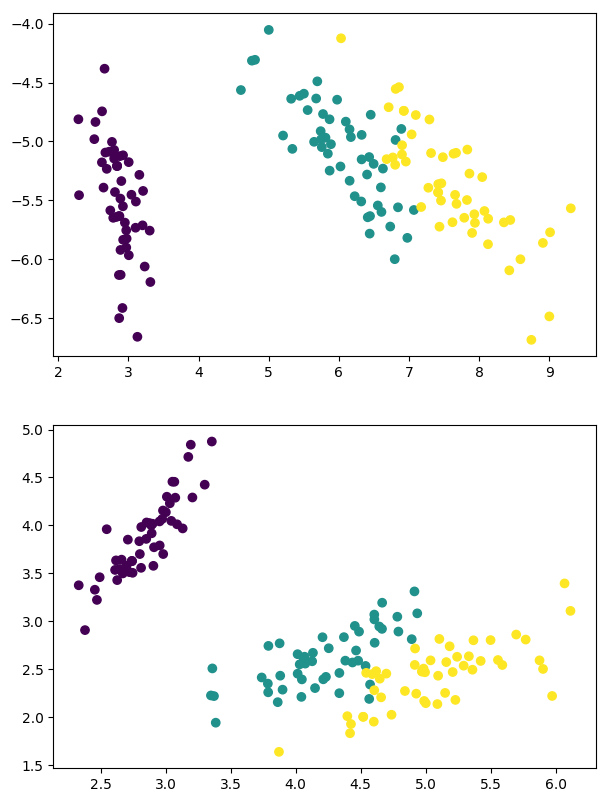

In [12]:
plt.figure(figsize=(7,10), dpi=100)
plt.subplot(211)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.subplot(212)
plt.scatter(X_autoencode[:,0], X_autoencode[:,1], c=labels)